# The Train Problem

## Problem Description
### Mathematical Language
Let graph $ G $ be a connected graph, where set $ V_G $ contains all the vertices within graph $ G $ and set $ E_G $ contains all the edges within graph $ G $.
Let set $ V_S $ be a set of vertices, where $ V_S $ is a subset of set $ V_G $.
Let path $ S $ be a subgraph of graph $ G $ which connects every vertex within set $ V_S $.
<br>
Given graph $ G $, set $ V_S $, and the root of path $ S $, which belongs to set $ V_S $, does path $ S $ exist?
If path $ S $ does exist, what is its smallest form like?

## Representation Preparation

In [204]:
# include required libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math

In [205]:
# define beautiful graph representation function
def show_graph_beautiful(G, size: int = 20):
    # position is stored as node attribute data for random_geometric_graph
    pos = nx.get_node_attributes(G, "pos")

    # find node near center (0.5,0.5)
    dmin = 1
    ncenter = 0
    for n in pos:
        x, y = pos[n]
        d = (x - 0.5) ** 2 + (y - 0.5) ** 2
        if d < dmin:
            ncenter = n
            dmin = d

    # color by path length from node near center
    p = dict(nx.single_source_shortest_path_length(G, ncenter))

    plt.figure(figsize=(size, size))
    nx.draw_networkx_edges(G, pos, edge_color=(.65, .65, .65, .4))
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(p.keys()),
        node_size=80,
        node_color=list(p.values()),
        vmax=max(p.values())+1,
        cmap=plt.cm.Greys_r,
    )

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis("off")
    plt.show()

In [206]:
# define graph representation function
def show_graph(G: nx.Graph, with_weight = False, with_name = False, size: int = 20,
               highlight_nodes: list[tuple[list[int], tuple[float, float, float, float]]] = None,
               highlight_edges: list[tuple[list[tuple[int, int]], tuple[float, float, float, float]]] = None):
    highlight_nodes = highlight_nodes or {}
    highlight_edges = highlight_edges or {}

    pos = nx.get_node_attributes(G, "pos")
    plt.figure(figsize=(size, size))
    edge_color = []
    for each in G.edges:
        b = len(edge_color)
        for key, value in highlight_edges:
            if each in key or (each[1], each[0]) in key:
                edge_color.append(value)
                break
        if b == len(edge_color):
            edge_color.append((.8, .8, .8, .6))
    nx.draw_networkx_edges(G,
                           pos,
                           edge_color=edge_color
    )
    if with_weight:
        nx.draw_networkx_edge_labels(
            G,
            pos,
            edge_labels=nx.get_edge_attributes(G, 'weight'),
            font_size= 4
        )
    node_color = []
    for each in G.nodes:
        b = len(node_color)
        for key, value in highlight_nodes:
            if each in key:
                node_color.append(value)
                break
        if b == len(node_color):
            node_color.append((.75, .75, .75, 1))
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=50,
        node_color=node_color
    )
    if with_name:
        nx.draw_networkx_labels(
            G,
            pos=pos,
            labels={i: str(i) for i in G.nodes},
            font_size= 5
        )

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis("off")
    plt.show()

## Maps Collection

In [207]:
G_three_islands = nx.random_geometric_graph(200, 0.125, seed=896803)
V_S_three_islands = [55, 185, 81, 82, 178, 112, 68, 29, 190, 0, 35]

G_small_harbour = nx.random_geometric_graph(15, 0.318, seed=42)

G_Judy = nx.random_geometric_graph(822, 0.065, seed=20070129)
V_S_Judy = [642, 129, 318, 43, 103, 434, 129, 638, 795, 249, 433, 745, 440, 316]

G_two_islands = nx.random_geometric_graph(42, 0.22, seed=42)

G_seven_bridges = nx.Graph()
G_seven_bridges.add_node('A', pos=(0.5, 0.9))
G_seven_bridges.add_node('B', pos=(0.5, 0.6))
G_seven_bridges.add_node('C', pos=(0.5, 0.2))
G_seven_bridges.add_node('D', pos=(0.9, 0.6))
G_seven_bridges.add_node(1, pos=(.2, .8))
G_seven_bridges.add_node(2, pos=(.5, .8))
G_seven_bridges.add_node(3, pos=(.65, .8))
G_seven_bridges.add_node(4, pos=(.65, .6))
G_seven_bridges.add_node(5, pos=(.2, .35))
G_seven_bridges.add_node(6, pos=(.65, .35))
G_seven_bridges.add_node(7, pos=(.9, .2))
G_seven_bridges.add_edges_from([('A',1),('A',2),('A',3),('B',1),('B',2),('B',4),('B',5),('B',6),('C',5),('C',6),('C',7),('D',3),('D',4),('D',7)])
V_S_seven_bridges = list(range(1,8))

## Objects Generation

In [208]:
# define the overall random seed
random_seed = 20070129

In [209]:
# create graph G
# Use seed when creating the graph for reproducibility
G: nx.Graph = G_seven_bridges
# G: nx.Graph = nx.complete_graph(10)
# pos = nx.circular_layout(G, center=(0.5, 0.5), scale=0.5)
# for i in G.nodes:
#     G.nodes[i]['pos'] = pos[i]
# G.remove_edges_from([(1,4),(4,0)])

# Assign weights based on Euclidean distance between vertices
for u, v in G.edges():
    x1, y1 = G.nodes[u]['pos']
    x2, y2 = G.nodes[v]['pos']
    weight = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    G.edges[u, v]['weight'] = weight
del u, v, weight, x1, y1, x2, y2

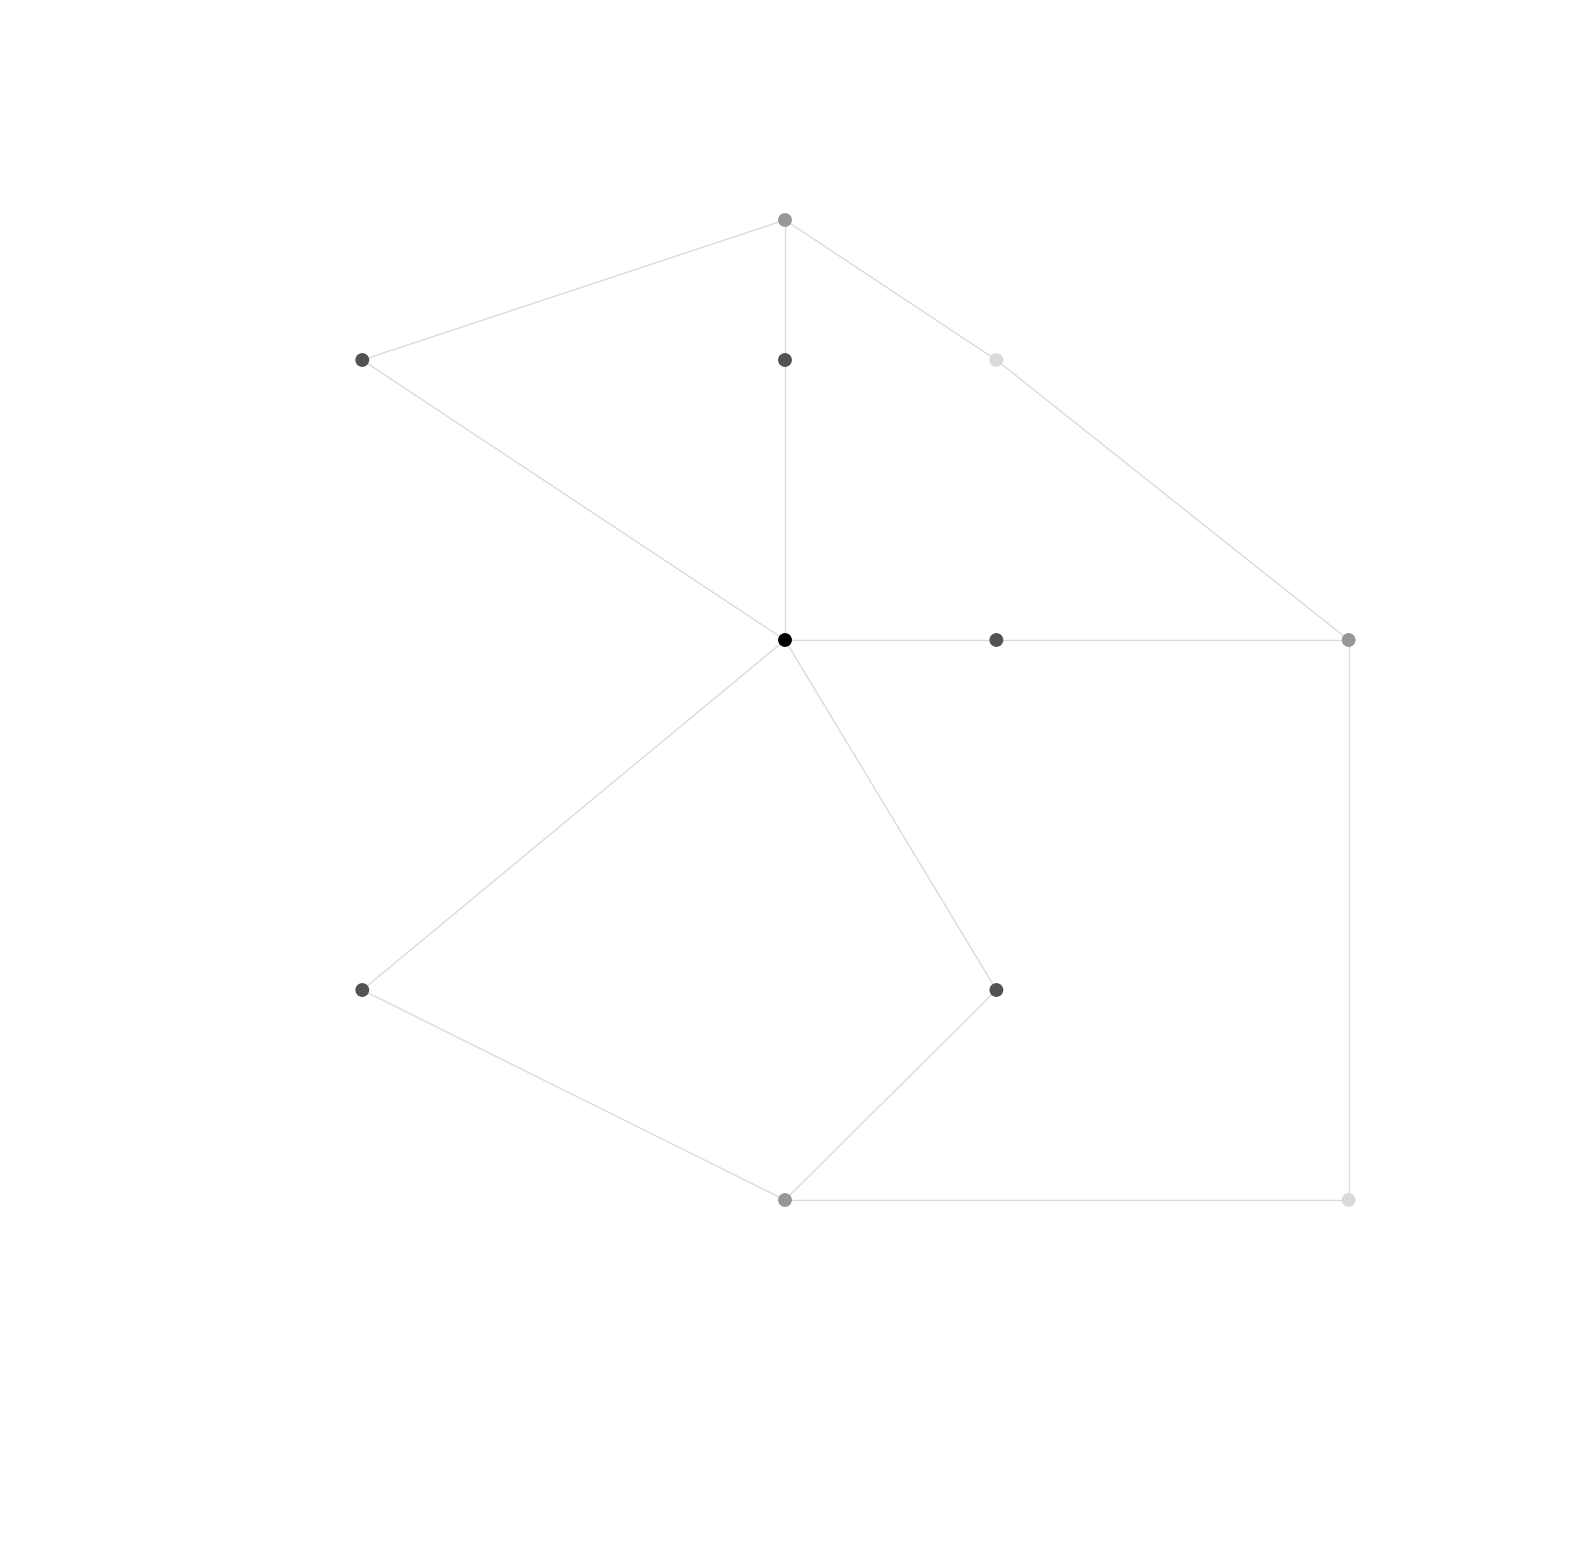

In [210]:
# check the graph
show_graph_beautiful(G)

In [211]:
# create set V_G
V_G: list[int] = list(G.nodes())
# check V_G
print(V_G)

['A', 'B', 'C', 'D', 1, 2, 3, 4, 5, 6, 7]


In [212]:
# create set V_S
random.seed(random_seed)
V_S: list[int] = V_S_seven_bridges
# check V_S
print(V_S)

[1, 2, 3, 4, 5, 6, 7]


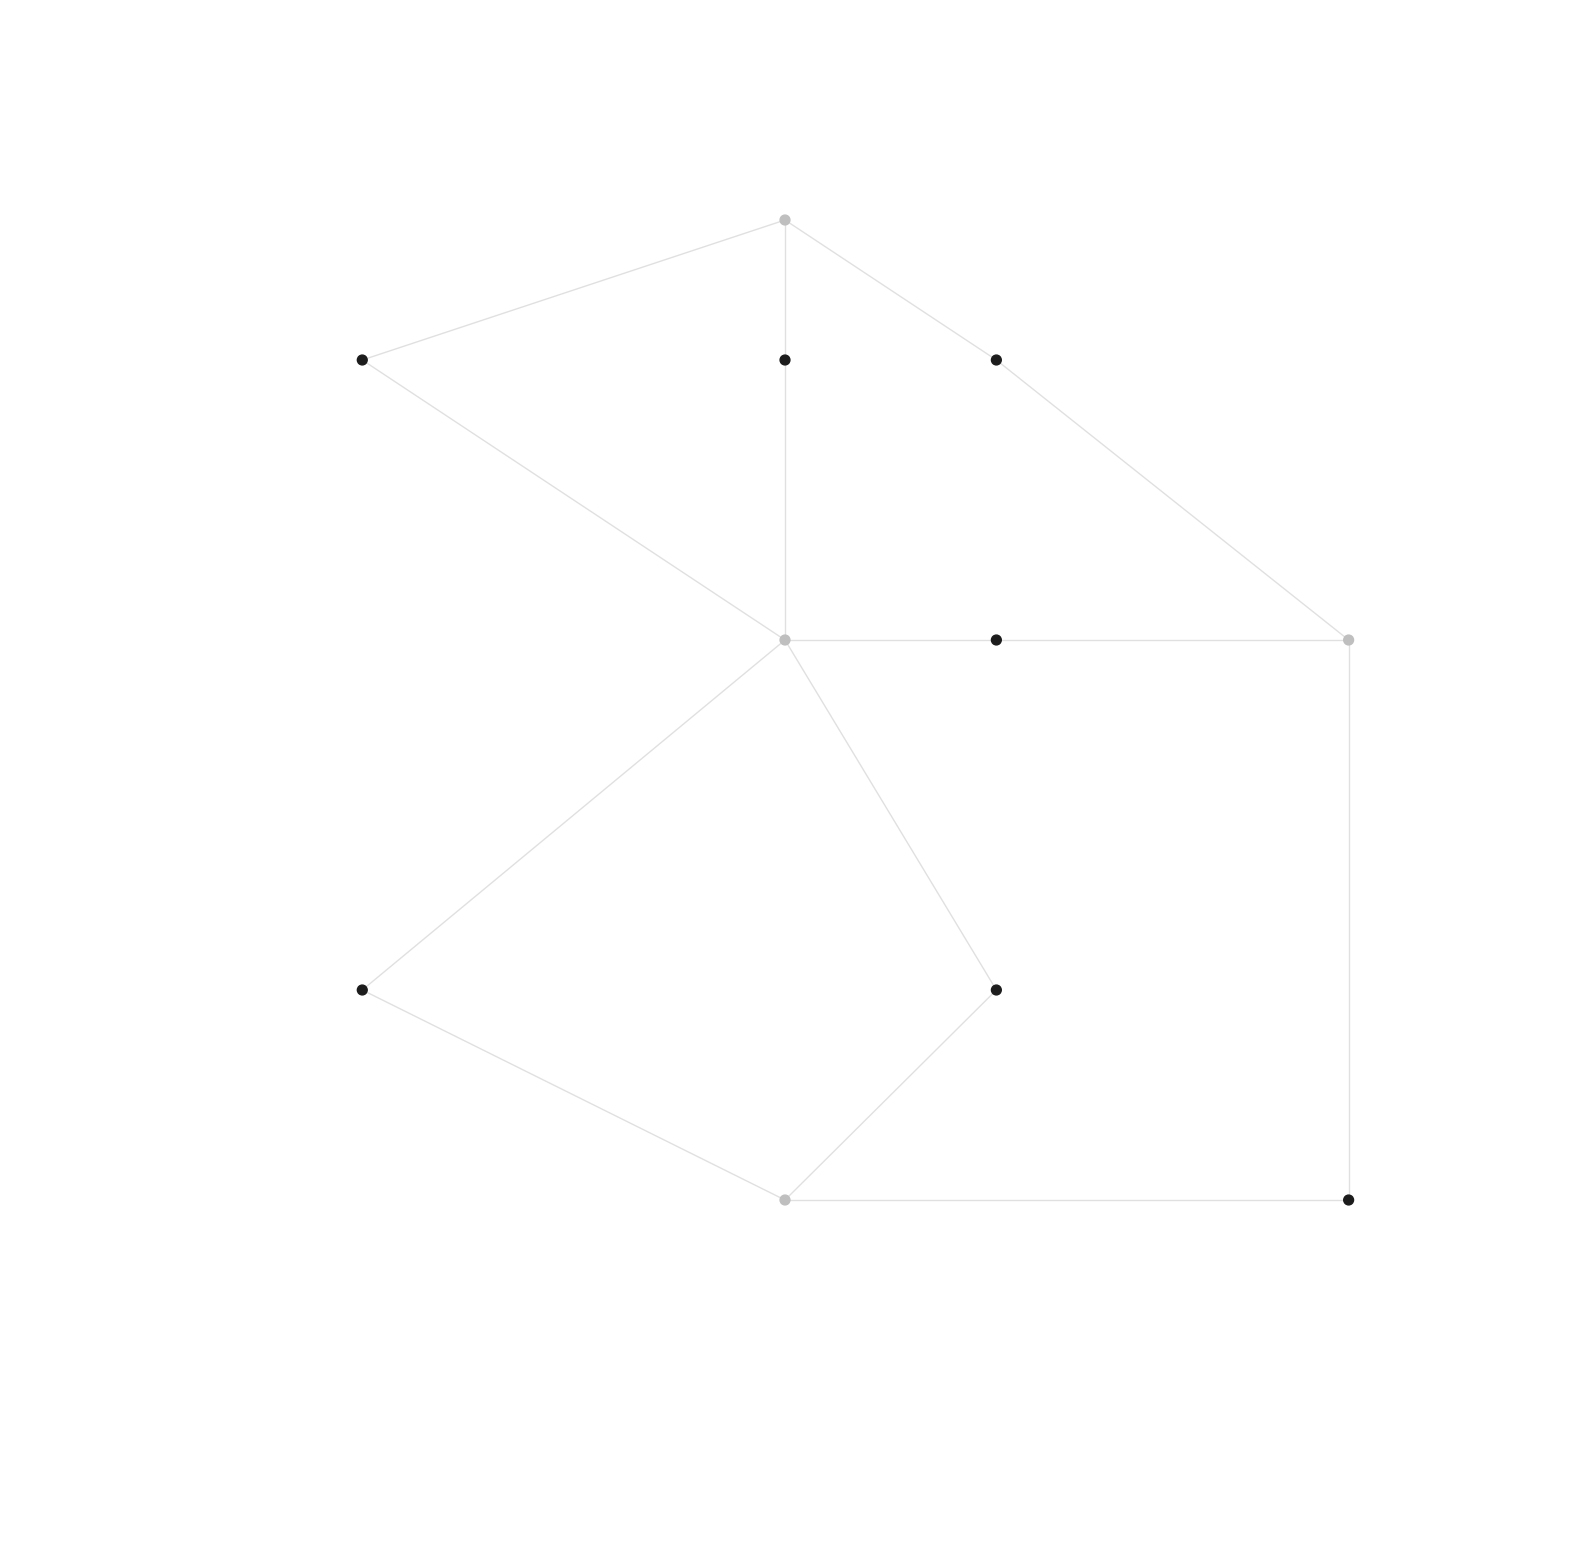

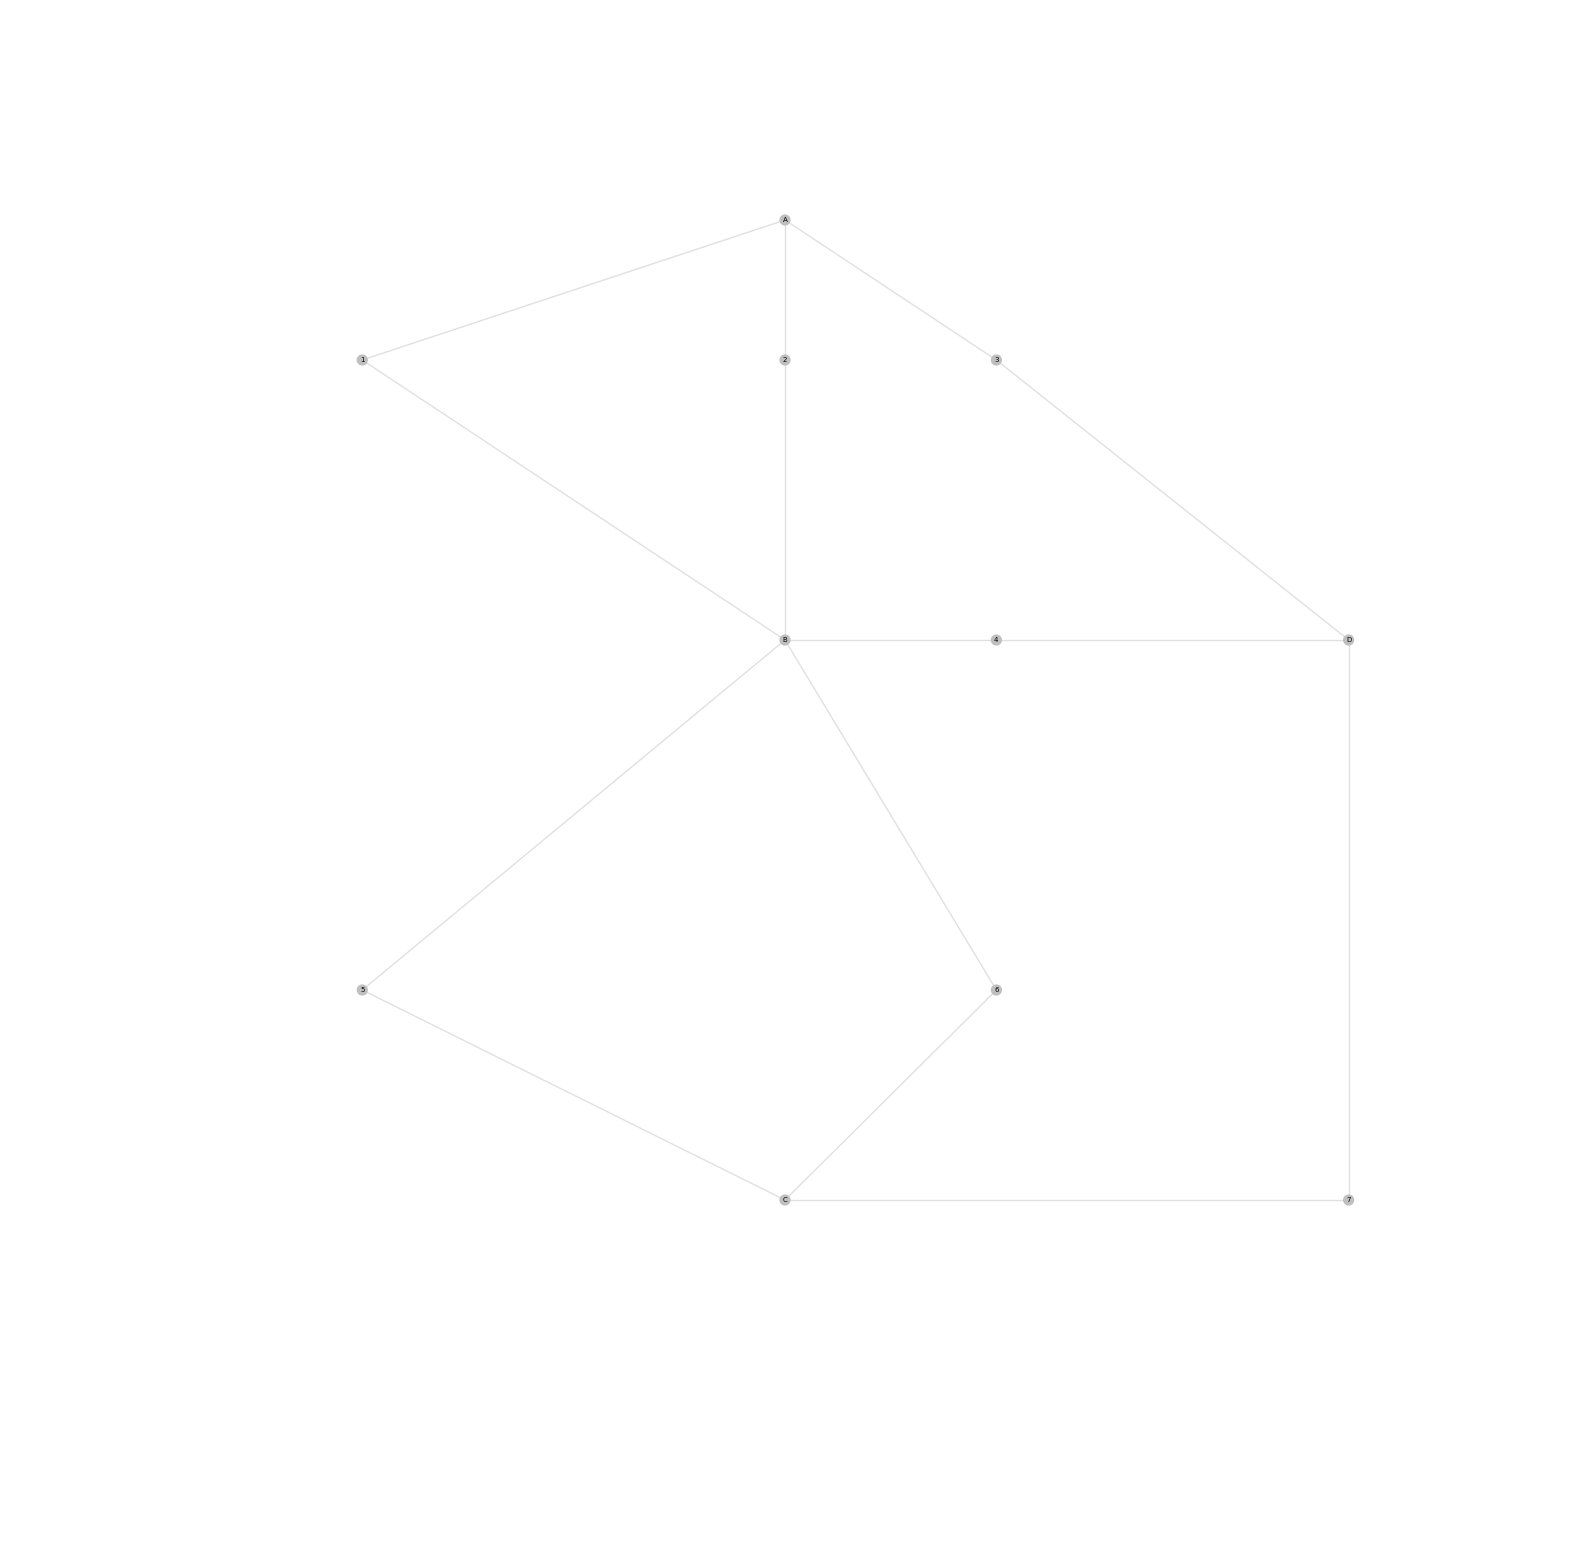

In [213]:
# check the graph again with additional information
show_graph(G, size=20, with_name=False, with_weight=False, highlight_nodes=[(V_S, (.11, .11, .11, 1))])
show_graph(G, size=20, with_name=True, with_weight=False)
# show_graph(G, size=12, with_name=True, with_weight=True, highlight_nodes=V_S)

## Solution Helpers

In [214]:
# define class Path
class Path:
    def __init__(self, nodes: list[int], weight: float, attributes: dict = None):
        if len(nodes) == 0:
            raise ValueError('nodes should contain at least one node')
        self.nodes = nodes
        self.weight = weight
        self.attributes = attributes or {}

    @property
    def edges(self) -> list[tuple[int]]:
        ret = []
        l = self.nodes[0]
        for each in self.nodes[1:]:
            ret.append((l, each))
            l = each
        return ret

    @property
    def head(self):
        return self.nodes[-1]

    @property
    def root(self):
        return self.nodes[0]

    def __lt__(self, other: 'Path'):
        return self.weight < other.weight

    def __gt__(self, other: 'Path'):
        return self.weight > other.weight

    def __eq__(self, other: 'Path'):
        return self.weight == other.weight

    def __add__(self, other):
        node = other[0]
        weight = other[1]['weight']
        ret = Path(self.nodes + [node], self.weight + weight, self.attributes.copy())
        return ret

    def __str__(self):
        str_node = 'nodes: ' + str(self.nodes)
        str_weight = 'weight: ' + str(self.weight)
        return str_node + '\n' + str_weight

    def __getitem__(self, item):
        return self.attributes[item]

    def __setitem__(self, key, value):
        self.attributes[key] = value

    def reverse(self):
        self.nodes = self.nodes.reverse()

## Solution Process

In [215]:
def f():
    tries: list[Path] = [Path(nodes=[V_S[0]], weight=0, attributes={'achieved': {V_S[0]}})]
    V_Dominated: dict[int, dict[tuple[int], float]] = {V_S[0]: {tuple(sorted([V_S[0]])): 0}}
    candidate: Path or None = None

    while len(tries):
        selected_try = tries[0]
        for each_try in tries:
            if each_try < selected_try:
                selected_try = each_try

        tries.remove(selected_try)

        if candidate is None or candidate > selected_try:
            for each in G[selected_try.head].items():
                if each[0] in selected_try.nodes:
                    continue

                this: Path = selected_try + each
                this['achieved'] = this['achieved'].copy()

                if each[0] in V_Dominated:
                    validation = [V_Dominated[each[0]][ae] for ae in V_Dominated[each[0]] if this['achieved'].issubset(set(ae))]
                    if len(validation) and this.weight >= min(validation):
                        continue
                    else:
                        V_Dominated[each[0]][tuple(sorted(this['achieved']))] = this.weight
                else:
                    V_Dominated[each[0]]: dict[tuple[int], float] = {tuple(sorted(this['achieved'])): this.weight}
                if each[0] in V_S:
                    this['achieved'].add(each[0])
                if len(this['achieved']) == len(V_S):
                    if candidate is None or candidate > this:
                        candidate = this
                else:
                    tries.append(this)
    return candidate

V_S_backup = V_S
candidates = []
for i in range(1,len(V_S)):
    V_S = V_S_backup
    V_S[0], V_S[i] = V_S[i], V_S[0]
    result = f()
    if result:
        candidates.append(result)
candidate = min(candidates) if candidates else None

In [216]:
print(candidate)

None


In [217]:
show_graph(G, size=20, with_name=True,
           highlight_nodes=[([V_S[0]], (.5, .11, .11, 1)), (V_S[1:], (.11, .11, .11, 1))],
           highlight_edges=[(candidate.edges, (.25, .25, .25, .6))])

AttributeError: 'NoneType' object has no attribute 'edges'